<a href="https://colab.research.google.com/github/satriakipang/Proyek-Kedua-Recommender-System-Dicoding/blob/main/Proyek_Kedua_Recommender_System_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instal dan import library



In [1]:
#Instal requirement yang di butuhkan 
!pip install opendatasets
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import optuna
import opendatasets
import os

In [3]:
os.environ['Your Kaggle username:'] = "fransiskusricardo"
os.environ['Your Kaggle Key:'] = "e178a4405fe43a23694788cd680b92fe"

#2. Load Dataset

In [4]:
if os.path.exists('book-recommendation-dataset'):
  print("file sudah ada")
else:
  opendatasets.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset', data_dir='')

file sudah ada


#3. Data understanding

In [5]:
# Load dataset

books = pd.read_csv('book-recommendation-dataset/Books.csv')
ratings = pd.read_csv('book-recommendation-dataset/Ratings.csv')
users = pd.read_csv('book-recommendation-dataset/Users.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Informasi data:

Attribute  | Keterangan
------------- | -------------
Books.csv
Sumber | https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
ISBN | Kode ISBN dari Buku
Book-Title | Judul Buku
Book-Author | Nama Penulis buku
Year-Of-Publication | Tahun Terbit Buku
Publisher | Nama Penerbit Buku
Image-URL-S | URL Menuju Gambar Buku Berukuran Kecil
Image-URL-M | URL Menuju Gambar Buku Berukuran Sedang
Image-URL-L | URL menuju Gambar Buku Berukuran Besar
Ratings.csv


In [6]:
print("Books Shape: " ,books.shape)
print("Ratings Shape: " ,ratings.shape)
print("Users Shape: " ,users.shape)

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


## 3.1. Book (Buku)

Berikut akan memuat isi file Books.csv.

In [7]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Pada dataset Books.csv terdapat 271360 baris dan 8 kolom. Pada kolom berisi data Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L


Informasi data Books.csv :

Attribute  | Keterangan
------------- | -------------
ISBN | Kode ISBN dari Buku
Book-Title | Judul Buku
Book-Author | Nama Penulis buku
Year-Of-Publication | Tahun Terbit Buku
Publisher | Nama Penerbit Buku
Image-URL-S | URL Menuju Gambar Buku Berukuran Kecil
Image-URL-M | URL Menuju Gambar Buku Berukuran Sedang
Image-URL-L | URL menuju Gambar Buku Berukuran Besar


## 3.2. Ratings

Berikut akan memuat isi file Ratings.csv.

In [9]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Selanjutnya, menghitung Jumlah buku pada setiap reting.

In [10]:
ratings.groupby('Book-Rating').count()

,User-ID,ISBN
Book-Rating,,
0,716109,716109
1,1770,1770
2,2759,2759
3,5996,5996
4,8904,8904
5,50974,50974
6,36924,36924
7,76457,76457
8,103736,103736


Selanjutnya akan mengecek distribusi rating pada Ratings.csv, mengunakan fungsi **describe()**.

In [11]:
ratings.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,User-ID,Book-Rating
count,1149780.000000,1149780.000000
mean,140386.395126,2.866950
std,80562.277719,3.854184
min,2.000000,0.000000
25%,70345.000000,0.000000
50%,141010.000000,0.000000
75%,211028.000000,7.000000
max,278854.000000,10.000000


Selanjutnya, akan di visualisasikan jumlah reting yang diberikan oleh user.

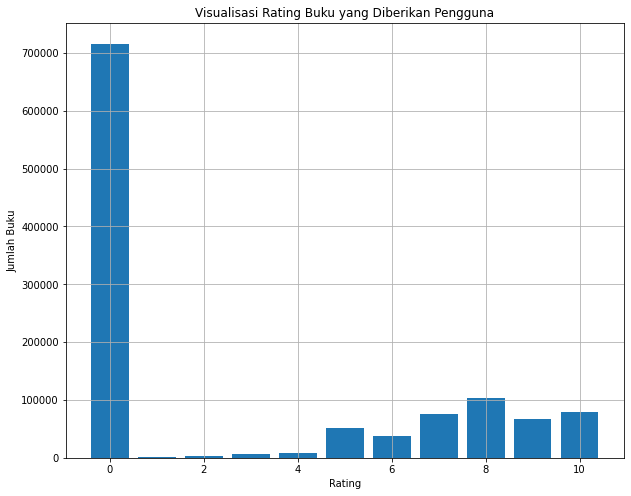

In [12]:
rating_counter = ratings.groupby('Book-Rating').count()
plt.figure(figsize=(10,8))
plt.title('Visualisasi Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()
     

Pada visualisasi diagram diperoleh bahwa reting yang diberikan dari 0 sampai 10 dan mayoritas user memberikan rating 0 pada buku, sehingga data tersebut tidak seimbang (imbalance).

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Pada dataset Ratings.csv terdapat 1149780 baris dan 3 kolom. Pada kolom berisi data ISBN, Book-Rating.


Informasi data Ratings.csv :

Attribute  | Keterangan
------------- | -------------
User-ID | ID Pengguna
ISBN | Kode ISBN dari Buku
Book-Rating | Rating Buku 

## 3.3. Users

Berikut akan memuat isi file Users.csv.

In [14]:
users     

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Selanjutnya akan mengecek distribusi umur user pada Users.csv, mengunakan fungsi describe().

In [15]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Pada dataset Users.csv terdapat 278858 baris dan 3 kolom. Pada kolom berisi data User-ID, Location, Age .


Informasi data Users.csv :

Attribute  | Keterangan
------------- | -------------
User-ID | ID Pengguna
Location | Lokasi Pengguna
Age | Usia Pengguna

# 4. Data Preparation

## 4.1. Menggabungkan data pada Books.csv dan Ratings.csv berdasarkan ISBN

In [17]:
data_buku = pd.merge(books, ratings , on='ISBN', how='left')
data_buku


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


## 4.2. Encoding Data

Pada tahap ini akan Encoding User-ID dan ISBN ke dalam indeks integer

In [18]:
# Mengubah userID menjadi unik
user_ids = ratings['User-ID'].unique().tolist()
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
     

In [19]:
# Mengubah ISBN menjadi unik
isbn_list = ratings['ISBN'].unique().tolist()
 
# Melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_list)}
 
# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_list)}

Selanjurnya akan dilakukan mapping ke dataframe ratings

In [20]:
# Mapping userID ke dataframe user
ratings['user'] = ratings['User-ID'].map(user_to_user_encoded)

In [21]:
# Mapping ISBN ke dataframe user
ratings['book'] = ratings['ISBN'].map(isbn_to_isbn_encoded)

In [22]:
ratings

,User-ID,ISBN,Book-Rating,user,book
0,276725,034545104X,0,0,0
1,276726,0155061224,5,1,1
2,276727,0446520802,0,2,2
3,276729,052165615X,3,3,3
4,276729,0521795028,6,3,4
...,...,...,...,...,...
1149775,276704,1563526298,9,105278,226347
1149776,276706,0679447156,0,105279,7295
1149777,276709,0515107662,10,105280,12065
1149778,276721,0590442449,10,105281,78598


Selanjutnya akan dicek jumlah user, jumlah buku, dan mengubah nilai rating menjadi float.

In [23]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
 
# Mendapatkan jumlah buku berdasarkan ISBN
num_isbn = len(isbn_encoded_to_isbn)
 
# Mengubah rating menjadi nilai float
ratings['Book-Rating'] = ratings['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum Book-Rating
min_rating = min(ratings['Book-Rating'])
 
# Nilai maksimal Book-Rating
max_rating = max(ratings['Book-Rating'])
 
print('Jumlah user: {}, Jumlah buku berdasarkan ISBN : {}, \nMin Rating: {}, Max Rating: {}'.format(
    num_users, num_isbn, min_rating, max_rating
))
     

Jumlah user: 105283, Jumlah buku berdasarkan ISBN : 340556, 
Min Rating: 0.0, Max Rating: 10.0


## 4.3. Membagi Data untuk Training dan Validasi

Pada tahap ini, akan dilakukan pembagian data menjadi data training dan validasi. 

Sebelumnya, akan diacak datanya untuk membuat distribusinya menjadi random.

In [24]:
# Mengacak dataset
df = ratings.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
178554,38781,0373259131,0.0,15560,99291
533905,128835,0811805905,8.0,49582,59185
1091374,261829,037324486X,0.0,99796,121427
1036247,247747,0531303306,0.0,94309,320740
309523,74076,0316812404,0.0,28854,32411
...,...,...,...,...,...
110268,25458,0142000191,0.0,10260,69256
259178,60146,0060964049,8.0,23699,527
131932,30509,1857230655,0.0,12254,79598
671155,163307,0446314145,0.0,62388,243103


Pada proses ini dataset dibagi menjadi 2 bagian, yaitu data yang akan digunakan untuk melatih model sebanyak 80% dan data untuk memvalidasi model sebanyak 20%.

In [25]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# 5. Modeling

## 5.1. Membuat Kelas RecommenderNet

In [26]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_isbn = num_isbn
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_isbn,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_isbn, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [27]:
tf.keras.backend.clear_session()

# Menerapkan nilai parameter paling optimal dari optuna
BEST_EMBEDDING_SIZE = 1

model = RecommenderNet(num_users, num_isbn, BEST_EMBEDDING_SIZE)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
     

Pada model digunkana Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

## 5.2 Melatih Model

In [28]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=64,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
14373/14373 [==============================] - 139s 10ms/step - loss: 0.5640 - root_mean_squared_error: 0.3686 - val_loss: 0.5257 - val_root_mean_squared_error: 0.3468
Epoch 2/10
14373/14373 [==============================] - 129s 9ms/step - loss: 0.5063 - root_mean_squared_error: 0.3362 - val_loss: 0.5122 - val_root_mean_squared_error: 0.3399
Epoch 3/10
14373/14373 [==============================] - 149s 10ms/step - loss: 0.4897 - root_mean_squared_error: 0.3265 - val_loss: 0.5076 - val_root_mean_squared_error: 0.3376
Epoch 4/10
14373/14373 [==============================] - 152s 11ms/step - loss: 0.4791 - root_mean_squared_error: 0.3202 - val_loss: 0.5061 - val_root_mean_squared_error: 0.3369
Epoch 5/10
14373/14373 [==============================] - 148s 10ms/step - loss: 0.4712 - root_mean_squared_error: 0.3154 - val_loss: 0.5060 - val_root_mean_squared_error: 0.3369
Epoch 6/10
14373/14373 [==============================] - 149s 10ms/step - loss: 0.4648 - root_mean_square

# 6. Evaluasi

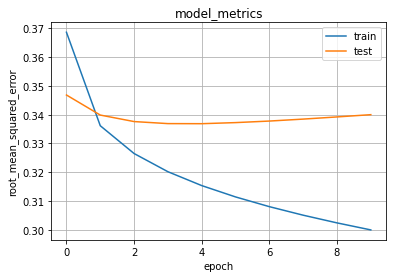

In [29]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

## 6.1. Mendapatkan Rekomendasi

In [30]:
books_df = books
df = pd.read_csv('book-recommendation-dataset/Ratings.csv')
 
# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_read_by_user = df[df['User-ID'] == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_read = books_df[~books_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN']
book_not_read = list(
    set(book_not_read)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)
 
book_not_read = [[isbn_to_isbn_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

Selanjutnya, untuk memperoleh rekomendasi buku, mengunakan fungsi model.predict().

In [32]:

ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_isbns = [
    isbn_encoded_to_isbn.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Rekomendasi untuk users: {}'.format(user_id))
print('===' * 9)
print('Buku dengan peringkat tinggi dari user lain')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = books_df[books_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row._3, "-", row._2)
 
print('----' * 8)
print('Top 10 Rekomendasi Buku')
print('----' * 8)
 
recommended_books = books_df[books_df['ISBN'].isin(recommended_book_isbns)]
for row in recommended_books.itertuples():
    print(row._3, "-", row._2)

8440/8440 [==============================] - 10s 1ms/step
Rekomendasi untuk users: 253106
Buku dengan peringkat tinggi dari user lain
--------------------------------
Harper Lee - To Kill a Mockingbird
Ann Patchett - Bel Canto: A Novel
Anita Shreve - The Last Time They Met : A Novel
Dominick Dunne - The Two Mrs. Grenvilles
Geoffrey Farrington - The Revenants
--------------------------------
Top 10 Rekomendasi Buku
--------------------------------
DR SEUSS - One Fish Two Fish Red Fish Blue Fish (I Can Read It All by Myself Beginner Books)
Paul Vincent - Free
Shel Silverstein - Falling Up
Neil Gaiman - Death: The High Cost of Living
Else Holmelund Minarik - A Kiss for Little Bear
Bill Watterson - There's Treasure Everywhere--A Calvin and Hobbes Collection
J. K. Rowling - Harry Potter and the Chamber of Secrets Postcard Book
Bradley Trevor Greive - The Blue Day Book: A Lesson in Cheering Yourself Up
Berkeley Breathed - Bloom County Babylon : Five Years of Basic Naughtiness (Bloom County)
